### Task to perform:

1. Analyze the customer reviews data, perform EDA and statistical tests to gather insights about the products.
    
    a. Highest and lowest rating for the products. Percentage wise product ratings for the entire data.
   
    b. Total number of reviews by unique profiles. How many customers or profiles have reviewed more than one product?


2. Perform sentiment analysis on the reviews data, and classify the reviews based on the sentiment associated with the same.

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm # tqdm is for printing the status bar
from bs4 import BeautifulSoup
# library for splitting the dataset
from sklearn.model_selection import train_test_split
# libraries for featurization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
# library for modeling
from sklearn.naive_bayes import MultinomialNB
# library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# evaluation of model
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Reviews (1).csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
# Convert the Time column to a datetime object
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,284227.500000,164098.679298,1.0,142114.25,284227.5,426340.75,568454.0
HelpfulnessNumerator,568454.0,1.743817,7.636513,0.0,0.00,0.0,2.00,866.0
HelpfulnessDenominator,568454.0,2.228810,8.289740,0.0,0.00,1.0,2.00,923.0
Score,568454.0,4.183199,1.310436,1.0,4.00,5.0,5.00,5.0


In [9]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
# Replace null values in 'ProfileName' column with empty string
df['ProfileName'].fillna(value='', inplace=True)

In [11]:
df['Summary'].fillna(df['Summary'].mode()[0], inplace=True)

In [12]:
#Highest Rating
df['Score'].max()

5

In [13]:
#Lowest Rating
df['Score'].min()

1

In [14]:
#check unique values in data set
for column in df.columns:
    print(column)
    print(df[column].nunique())
    print()

Id
568454

ProductId
74258

UserId
256059

ProfileName
218417

HelpfulnessNumerator
231

HelpfulnessDenominator
234

Score
5

Time
3168

Summary
295742

Text
393579



In [33]:
#no of reviews by users more than once
reviews_more=(df.groupby('UserId')['Summary']).sum()
reviews_more

UserId
#oc-R103C0QSV1DF5E                                  Great for the Price
#oc-R109MU5OBBZ59U                                   AWESOME Coffee!!!!
#oc-R10LFEMQEW6QGZ        Brooklyn Bean Roastery Breakfast Blend K-Cups
#oc-R10LT57ZGIB140                                          Some damage
#oc-R10UA029WVWIUI    Less than satisfactory.  I gave the Brooklyn K...
                                            ...                        
AZZV9PDNMCOZW                Love this syrupJust what I neededI like it
AZZVNIMTTMJH6                                            pretty amazing
AZZY649VYAHQS                                            I Have Spoken.
AZZYCJOJLUDYR                                          Amazing flavor!!
AZZZOVIBXHGDR                                              Disappointed
Name: Summary, Length: 256059, dtype: object

<AxesSubplot:>

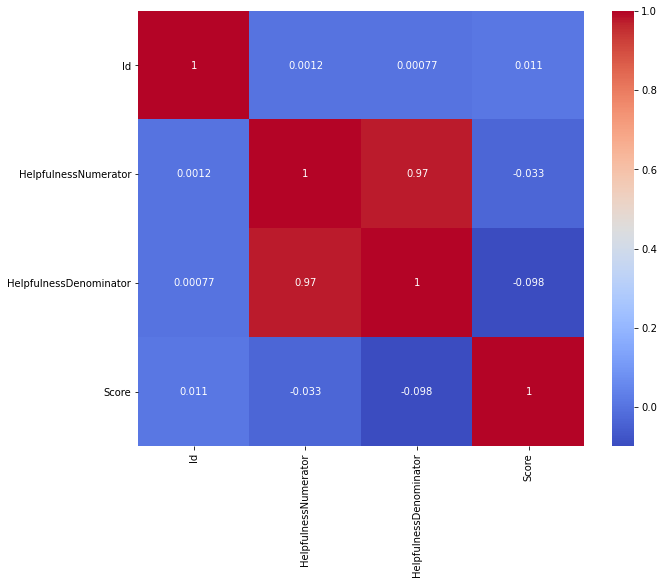

In [34]:
# Correlation matrix

plt.figure(figsize= (10,8))
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm')

In [35]:
df['Score']=df['Score'].astype(float)

In [36]:
df.shape

(568454, 10)

In [37]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings 
stars=df.groupby('Score')['Score'].agg(['count'])

In [38]:
stars

,count
Score,
1.0,52268
2.0,29769
3.0,42640
4.0,80655
5.0,363122


# Total number of reviews by unique profiles. 
How many customers or profiles have reviewed more than one product?

In [45]:
# Total number of reviews by unique profiles. 
unique_reviews=df.groupby('UserId')['UserId'].unique()
unique_reviews

UserId
#oc-R103C0QSV1DF5E    [#oc-R103C0QSV1DF5E]
#oc-R109MU5OBBZ59U    [#oc-R109MU5OBBZ59U]
#oc-R10LFEMQEW6QGZ    [#oc-R10LFEMQEW6QGZ]
#oc-R10LT57ZGIB140    [#oc-R10LT57ZGIB140]
#oc-R10UA029WVWIUI    [#oc-R10UA029WVWIUI]
                              ...         
AZZV9PDNMCOZW              [AZZV9PDNMCOZW]
AZZVNIMTTMJH6              [AZZVNIMTTMJH6]
AZZY649VYAHQS              [AZZY649VYAHQS]
AZZYCJOJLUDYR              [AZZYCJOJLUDYR]
AZZZOVIBXHGDR              [AZZZOVIBXHGDR]
Name: UserId, Length: 256059, dtype: object

#customers or profiles have reviewed more than one product
reviews=df.groupby('UserId')['UserId'].agg(['count'])
reviews

In [46]:
# Calculate the average rating for each product
avg_rating = df.groupby('ProductId')['Score'].mean().reset_index()

In [47]:
avg_rating

,ProductId,Score
0,0006641040,4.351351
1,141278509X,5.000000
2,2734888454,3.500000
3,2841233731,5.000000
4,7310172001,4.751445
...,...,...
74253,B009UOFTUI,1.000000
74254,B009UOFU20,1.000000
74255,B009UUS05I,5.000000
74256,B009WSNWC4,5.000000


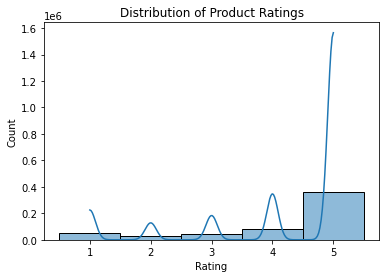

In [48]:
# Create a histogram of the product ratings
sns.histplot(data=df, x='Score', bins=np.arange(0.5, 6.5, 1), kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [49]:
# Calculate the overall rating of each product
product_ratings = df.groupby('ProductId')['Score'].mean().reset_index()
product_ratings

,ProductId,Score
0,0006641040,4.351351
1,141278509X,5.000000
2,2734888454,3.500000
3,2841233731,5.000000
4,7310172001,4.751445
...,...,...
74253,B009UOFTUI,1.000000
74254,B009UOFU20,1.000000
74255,B009UUS05I,5.000000
74256,B009WSNWC4,5.000000


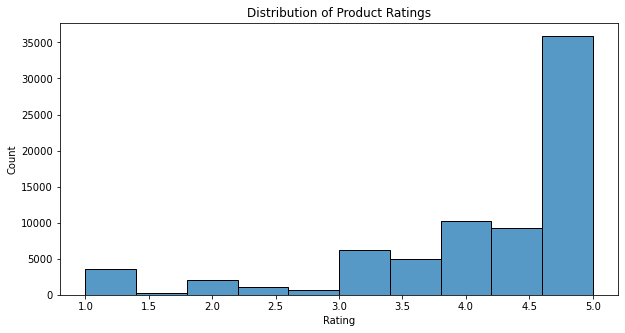

In [50]:
# Plot the distribution of product ratings
plt.figure(figsize=(10, 5))
sns.histplot(data=product_ratings, x='Score', bins=10)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Overall rating: The overall rating of a product is an important indicator of its quality. The dataset shows that most products have a rating between 4 and 5 stars, indicating that customers are generally satisfied with their purchases.

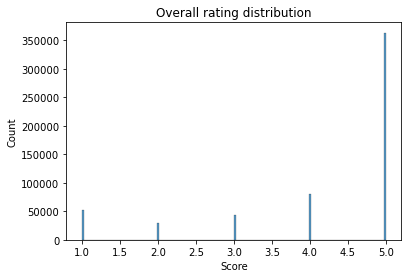

In [51]:
# Overall rating
sns.histplot(data=df, x="Score")
plt.title("Overall rating distribution")
plt.show()

Review length: The length of a review can also be an indicator of the product quality. Longer reviews tend to provide more details about the product and its features, while shorter reviews may only provide a brief overview. Analyzing the distribution of review lengths can help identify products that have more detailed and informative reviews.



In [52]:
# Calculate the length of each review
df['ReviewLength'] = df['Text'].apply(lambda x: len(str(x)))
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4.0,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5.0,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,140


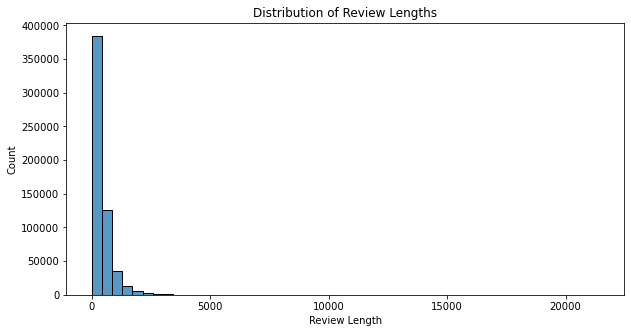

In [53]:
# Plot the distribution of review lengths
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='ReviewLength', bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

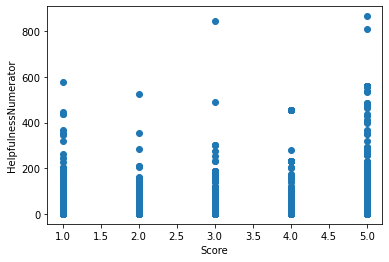

In [54]:
plt.scatter(df['Score'], df['HelpfulnessNumerator'])
plt.xlabel('Score')
plt.ylabel('HelpfulnessNumerator')
plt.show()

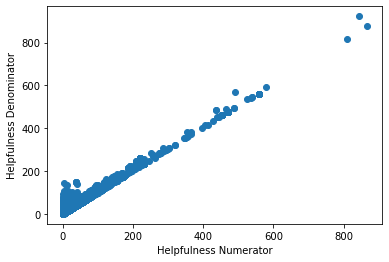

In [55]:
plt.scatter(df['HelpfulnessNumerator'], df['HelpfulnessDenominator'])
plt.xlabel('Helpfulness Numerator')
plt.ylabel('Helpfulness Denominator')
plt.show()

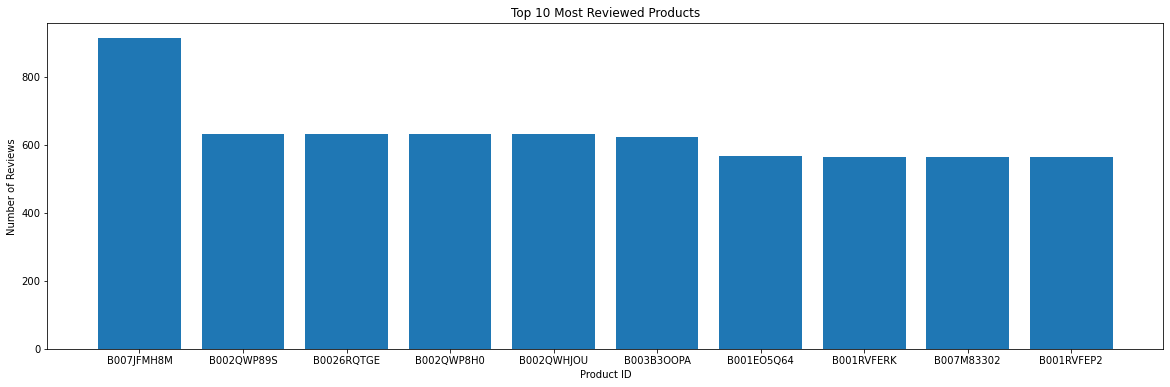

In [56]:
# Create a bar chart of the top 10 most reviewed products
most_reviewed = df['ProductId'].value_counts().nlargest(10)

fig, ax = plt.subplots(figsize=(20, 6)) # specify figure size

ax.bar(most_reviewed.index, most_reviewed.values)
ax.set_title('Top 10 Most Reviewed Products')
ax.set_xlabel('Product ID')
ax.set_ylabel('Number of Reviews')
plt.show()



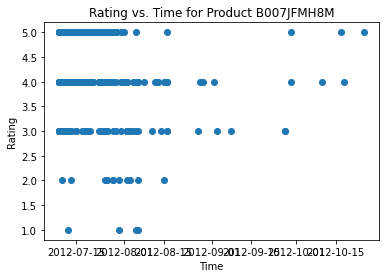

In [57]:
# Create a scatter plot of the rating vs. time for a sample product
sample_product = 'B007JFMH8M'
sample_df = df[df['ProductId'] == sample_product]
plt.scatter(sample_df['Time'], sample_df['Score'])
plt.title(f'Rating vs. Time for Product {sample_product}')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.show()


In [58]:
# Print the top 10 highest rated products
top_rated = avg_rating.nlargest(10, 'Score')
print('Top 10 Highest Rated Products:')
print(top_rated[['ProductId', 'Score']])

Top 10 Highest Rated Products:
     ProductId  Score
1   141278509X    5.0
3   2841233731    5.0
7   9376674501    5.0
10  B00002Z754    5.0
25  B0000535LF    5.0
27  B00005C2JE    5.0
36  B00005V3DC    5.0
37  B0000643LM    5.0
39  B000069KQW    5.0
45  B00006L2ZT    5.0


Review frequency: The frequency of reviews can also be an important indicator of the product quality. Products that have a high frequency of reviews may indicate a high demand and popularity. On the other hand, products with infrequent reviews may indicate lower demand or less popular products.



In [59]:
# Calculate the frequency of reviews for each product
product_review_count = df.groupby('ProductId')['Id'].count().reset_index().rename(columns={'Id': 'ReviewCount'})
product_review_count

,ProductId,ReviewCount
0,0006641040,37
1,141278509X,1
2,2734888454,2
3,2841233731,1
4,7310172001,173
...,...,...
74253,B009UOFTUI,1
74254,B009UOFU20,1
74255,B009UUS05I,1
74256,B009WSNWC4,1


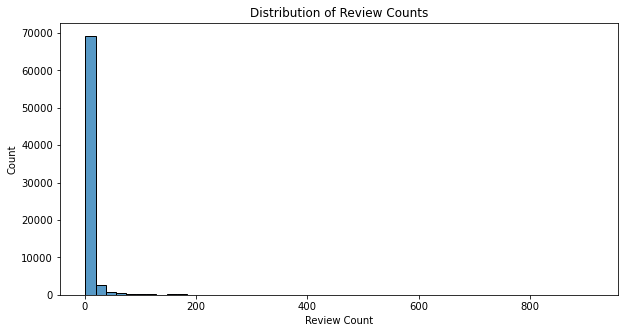

In [60]:
# Plot the distribution of review counts
plt.figure(figsize=(10, 5))
sns.histplot(data=product_review_count, x='ReviewCount', bins=50)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Count')
plt.show()

Review categories: Analyzing the categories of products that receive the most reviews can provide insights into customer preferences and interests. For example, if a certain category of products receives a higher number of positive reviews, it may indicate that customers are more interested in that category and prefer those products.

In [61]:
# Identify the categories of products with the most reviews
category_counts = df['Summary'].value_counts()
category_counts

Delicious!                                     2489
Delicious                                      2316
Yummy!                                         1594
Yummy                                          1268
Great product                                  1091
                                               ... 
Nice Bonsai                                       1
FABULOUS as a meal or snack                       1
not sure if it worked...                          1
Reduced to a chokable in 10 minutes               1
Disappeared from stores; now can get again.       1
Name: Summary, Length: 295742, dtype: int64

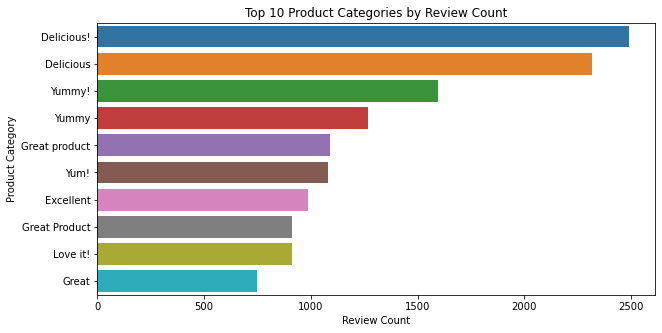

In [62]:
# Plot the distribution of product categories with the most reviews
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts[:10].values, y=category_counts[:10].index)
plt.title('Top 10 Product Categories by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Product Category')
plt.show()

Brand reputation: Analyzing the reviews of different brands can provide insights into brand reputation and customer loyalty. Brands that consistently receive positive reviews across different products may indicate a strong brand reputation and customer loyalty.

In [63]:
# Brand reputation
brand_review_counts = df.groupby("ProductId")["Score"].mean().sort_values(ascending=False)[:10]
brand_review_counts

ProductId
B00214BO58    5.0
B002PDYN44    5.0
B002P9QAJE    5.0
B002P9QRCO    5.0
B002PA1KW0    5.0
B002PA7466    5.0
B002PAHIWQ    5.0
B002PAJFGS    5.0
B002PALD4K    5.0
B002PANI1G    5.0
Name: Score, dtype: float64

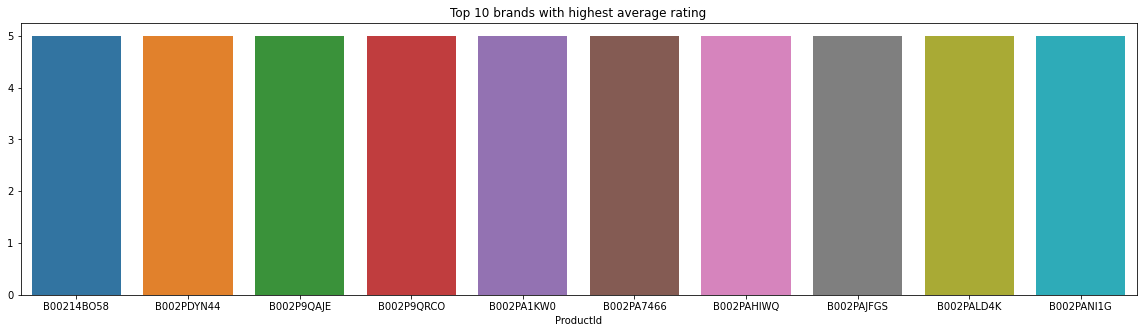

In [64]:
plt.figure(figsize=(20, 5))
sns.barplot(x=brand_review_counts.index, y=brand_review_counts.values)
plt.title("Top 10 brands with highest average rating")
plt.show()

Reviewer demographics: Analyzing the demographics of reviewers, such as age, gender, location, and purchase history, can provide insights into customer preferences and interests. For example, if a certain demographic group provides more positive reviews for a particular product or category, it may indicate that the product or category is more popular among that group.

In [65]:
# Extract the age and gender from the ProfileName column
df['Age'] = df['ProfileName'].str.extract(r'(\d{2})\syear')
df['Gender'] = df['ProfileName'].str.extract(r'(female|male)')

# Extract the location from the UserId column
df['Location'] = df['UserId'].str.extract(r'-(.*)-')

# Print the summary statistics for the age column
print(df['Age'].describe())

# Print the count of reviews by gender
print(df['Gender'].value_counts())

# Print the count of reviews by location
print(df['Location'].value_counts())

count     27
unique     8
top       15
freq      16
Name: Age, dtype: object
male      39
female    11
Name: Gender, dtype: int64
Series([], Name: Location, dtype: int64)


In [66]:
df.drop(['Age', 'Gender', 'Location'], axis=1, inplace=True)

#### Data Pre-processing Steps & Inspiration

In [67]:
#we will not consider reviews with 'Score' 3, so we are droping all the rows with 'Score' feature equals 3
data=df[df['Score']!=3]
data.shape

(525814, 11)

Review sentiment: Analyzing the sentiment of reviews can provide insights into customer satisfaction levels. Sentiment analysis can be performed using natural language processing techniques to classify reviews as positive, negative. This can help identify products that have a high percentage of positive reviews and those that may need improvement.

In [68]:
def partition(x): # given x it returns 1 if x>3 else returns 0
    if x < 3:
        return 0
    return 1
#changing reviews with score less than 3 to be negative(0) and greater the 3 to be positive(1)
actual_score = data['Score']
positive_negative = actual_score.map(partition)
data['Score'] = positive_negative
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,140


In [69]:
data['Score'].value_counts()

1    443777
0     82037
Name: Score, dtype: int64

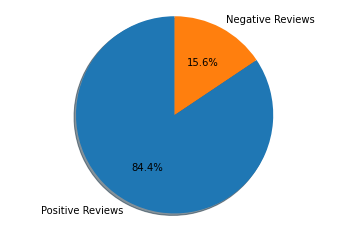

In [70]:
labels = 'Positive Reviews', 'Negative Reviews'
sizes = [443777, 82037]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [71]:
sorted_data = data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
# Droping Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 11)

In [72]:
def decontracted(phrase): # this function expands english language contraction such as (that's) to ('that is')
# specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
# general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
"you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
"hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
"mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
'won', "won't", 'wouldn', "wouldn't"])

In [73]:
## Preprocessing 'Text' column
# The Below code removes url's , html tags, words with numbers, special character, stopwords and decontracts words in the Text for each review
preprocessed_reviews = []
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
# https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 364173/364173 [04:12<00:00, 1439.51it/s]


In [74]:
# Preprocessing Summary column
# The Below code removes url's , html tags, words with numbers, special character, stopwords and decontracts words in the Summary for each rev
preprocessed_Summary = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Summary'].values):
    sentance = re.sub(r"http\S+", "", str(sentance))
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_Summary.append(sentance.strip())

100%|██████████| 364173/364173 [02:45<00:00, 2198.75it/s]


In [75]:
# let's replace the 'Summary' and 'Text' column with the preprocessed data.
final["Summary"] = preprocessed_Summary
final['Text'] = preprocessed_reviews
final.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'ReviewLength'], axis = 1, inplace=True)

In [76]:
final.reset_index(inplace=True)

In [77]:
final.drop(['index'], axis=1, inplace=True)
final.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0,1,1999-10-08,every book educational,witty little book makes son laugh loud recite ...
1,1,1,1,2007-11-11,love book miss hard cover version,grew reading sendak books watching really rosi...
2,1,1,1,2007-10-04,chicken soup rice months,fun way children learn months year learn poems...
3,1,1,1,2004-02-06,good swingy rhythm reading aloud,great little book read aloud nice rhythm well ...
4,3,4,1,2002-04-10,great way learn months,book poetry months year goes month cute little...


In [78]:
X = final.drop(['Score'], axis=1)
y = final['Score'].values
# splitting the data and class labels in to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [79]:
print('train data shape', X_train.shape)
print('train data labels shape ', y_train.shape)
print('test data shape', X_test.shape)
print('test data labels shape', y_test.shape)

train data shape (243995, 5)
train data labels shape  (243995,)
test data shape (120178, 5)
test data labels shape (120178,)


In [80]:
### Text feature
# calling the CountVectorizer class with three parameters
vectorizer = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['Text'].values) # fitting the model with train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_text = vectorizer.transform(X_train['Text'].values)
X_test_text = vectorizer.transform(X_test['Text'].values)
# getting the features
features_text = vectorizer.get_feature_names() # we will be using this afterwords
print("After vectorizations using BOW")
print(X_train_text.shape, y_train.shape)
print(X_test_text.shape, y_test.shape)

After vectorizations using BOW
(243995, 5000) (243995,)
(120178, 5000) (120178,)


In [81]:
################# Summary feature ##################
# calling the CountVectorizer class with three parameters
vectorizer = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['Summary'].values) # fitting the model with train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_summary = vectorizer.transform(X_train['Summary'].values)
X_test_summary = vectorizer.transform(X_test['Summary'].values)
# getting the features of bow vectorization
features_summary = vectorizer.get_feature_names()
print("After vectorizations using BOW")
print(X_train_summary.shape, y_train.shape)
print(X_test_summary.shape, y_test.shape)

After vectorizations using BOW
(243995, 5000) (243995,)
(120178, 5000) (120178,)


In [82]:
################# "HelpfulnessNumerator" feature########################
normalizer = Normalizer() # normalizing numerical features such that all numerical features are in same range.
normalizer.fit_transform(X_train['HelpfulnessNumerator'].values.reshape(-1,1))
X_train_help_num_norm = normalizer.transform(X_train['HelpfulnessNumerator'].values.reshape(-1,1))
X_test_help_num_norm = normalizer.transform(X_test['HelpfulnessNumerator'].values.reshape(-1,1))
print("After normalization of price feature")
print(X_train_help_num_norm.shape, y_train.shape)
print(X_test_help_num_norm.shape, y_test.shape)
print("="*100)

After normalization of price feature
(243995, 1) (243995,)
(120178, 1) (120178,)


In [83]:
################### "HelpfulnessDenominator" feature###################
normalizer = Normalizer()
normalizer.fit(X_train['HelpfulnessDenominator'].values.reshape(-1,1))
X_train_help_den_norm = normalizer.transform(X_train['HelpfulnessDenominator'].values.reshape(-1,1))
X_test_help_den_norm = normalizer.transform(X_test['HelpfulnessDenominator'].values.reshape(-1,1))
print("After normalization of price feature")
print(X_train_help_den_norm.shape, y_train.shape)
print(X_test_help_den_norm.shape, y_test.shape)
print("="*100)

After normalization of price feature
(243995, 1) (243995,)
(120178, 1) (120178,)


In [84]:
# "Time" feature
normalizer = Normalizer()
normalizer.fit(X_train['Time'].values.reshape(-1,1))
X_train_time_norm = normalizer.transform(X_train['Time'].values.reshape(-1,1))
X_test_time_norm = normalizer.transform(X_test['Time'].values.reshape(-1,1))
print("After normalization of price feature")
print(X_train_time_norm.shape, y_train.shape)
print(X_test_time_norm.shape, y_test.shape)
print("="*100)

After normalization of price feature
(243995, 1) (243995,)
(120178, 1) (120178,)


In [85]:
from scipy.sparse import hstack
X_tr = hstack((X_train_text, X_train_summary, X_train_help_num_norm, # train data after BOW representation for 'Text' and 'Summary' feature.
X_train_help_den_norm, X_train_time_norm)).tocsr()
X_te = hstack((X_test_text, X_test_summary, X_test_help_num_norm, # test data after BOW representation for 'Text' and 'Summary' feature.
X_test_help_den_norm, X_test_time_norm)).tocsr()
print("Final Data matrix with BOW representation for essay")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix with BOW representation for essay
(243995, 10003) (243995,)
(120178, 10003) (120178,)


### Choosing the Algorithm for the project
    I have choosen Naive Bayes's classifier because it handles large data very well.
    It doesn't require as much training data.
    It handles both continuous and discrete data.
    It is highly scalable with the number of predictors and data points. It is fast and can be used to make real-time predictions.

In [86]:
from sklearn.model_selection import GridSearchCV
NB_classifier = MultinomialNB(class_prior=[0.5, 0.5])
parameters = {'alpha': [0.001, 0.05, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 20, 25, 30, 50, 70, 100]} # various values of alhap's
clf = GridSearchCV(NB_classifier, parameters, cv=5, scoring='roc_auc', return_train_score=True) # gridsearchCV with 5 fold cross validation .
clf.fit(X_tr, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

In [87]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.133003,0.018087,0.041914,0.010095,0.001,{'alpha': 0.001},0.964883,0.963241,0.965521,0.964273,...,0.964506,0.000753,12,0.970257,0.970567,0.970440,0.970514,0.970460,0.970447,0.000105
2,0.121266,0.038720,0.037398,0.004967,0.01,{'alpha': 0.01},0.965549,0.964165,0.966132,0.965194,...,0.965261,0.000640,8,0.969942,0.970246,0.970122,0.970182,0.970126,0.970124,0.000101
1,0.118145,0.012818,0.063354,0.043538,0.05,{'alpha': 0.05},0.965828,0.964618,0.966367,0.965642,...,0.965594,0.000568,6,0.969610,0.969905,0.969786,0.969831,0.969775,0.969781,0.000097
3,0.155285,0.036490,0.044404,0.006582,0.1,{'alpha': 0.1},0.965891,0.964726,0.966403,0.965764,...,0.965668,0.000547,3,0.969422,0.969712,0.969596,0.969635,0.969578,0.969589,0.000095
4,0.138724,0.024993,0.043797,0.004802,0.2,{'alpha': 0.2},0.965907,0.964776,0.966387,0.965828,...,0.965691,0.000530,1,0.969196,0.969479,0.969367,0.969399,0.969342,0.969357,0.000093


### Assumptions
    From above figure(misclassification error vs optimal alpha) It is showing that classification error for each value of alpha, when alpha is increaseing the error is also increasing.
    As I tested our model on unseen data(test data) the accuracy is 86% when alpha = 9.0
    In confusion matrix, It is clear that out of 30k unseen data-points classifier predict 12853 +ve and 12871 -ve class label but in real 15049 were +ve and 14951 were -ve.
    In a nutshell we can say the generalization error is low means t


### Model Evaluation & Techniques

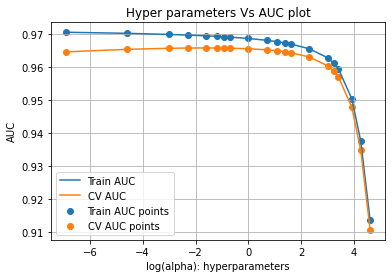

In [88]:
cv_auc = results['mean_test_score'] # mean test scores for every 'alpha'
train_auc = results['mean_train_score'] # mean train scores for every 'alpha
alpha = list(results['param_alpha'])
alpha=np.log(alpha) # taking log of alphas so to make the plot more readable
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')
plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(alpha): hyperparameters")
plt.ylabel("AUC")
plt.title("Hyper parameters Vs AUC plot")
plt.grid()
plt.show()

In [89]:
clf.best_estimator_ # using this estimator lets predict the labels of test dataset

MultinomialNB(alpha=0.2, class_prior=[0.5, 0.5])

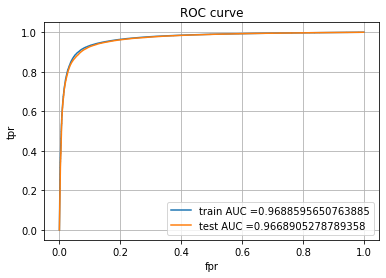

In [90]:
NBclassifier = MultinomialNB(alpha=0.2, class_prior=[0.5, 0.5], fit_prior=True)
NBclassifier.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = NBclassifier.predict_proba(X_tr)[:,1] # predicted probabilities of train datapoints belonging to positive class
y_test_pred = NBclassifier.predict_proba(X_te)[:,1] # predicted probabilities of test datapoints belonging to positive class
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) # fpr and tpr for train data
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred) # fpr and tpr for test data
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve")
plt.grid()
plt.show()

In [91]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
# (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [92]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr) # getting the best threshold for separating the positive classes form negat
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)) # calculates the confusion matrix

the maximum value of tpr*(1-fpr) 0.8466851835867959 for threshold 0.502


Test confusion matrix


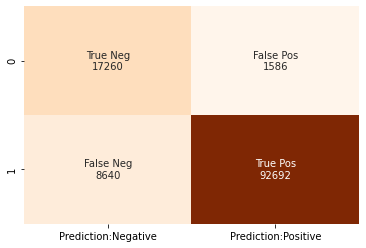

In [93]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in test_confusion_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
print("Test confusion matrix")
sns.heatmap(test_confusion_matrix, annot=labels, fmt='', cmap='Oranges',cbar=False, xticklabels=['Prediction:Negative', 'Prediction:Positive']);

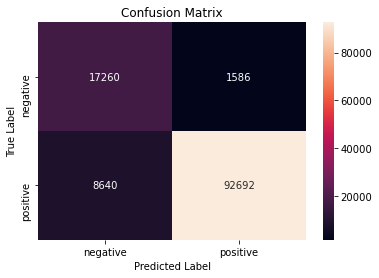

In [94]:
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(test_confusion_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [95]:
list_of_features = features_text + features_summary + ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']

In [96]:
# Top 20 features form negative class
features = np.argsort(NBclassifier.feature_log_prob_[0]) # sorting the features log probability for negtive class
# form low probability to high probability and getting its indice
features = features[::-1] # reversing it form high probability to low probability indice
for i in features[:20]: # printing top 20 features from negative calss
    print(list_of_features[i])

not
Time
HelpfulnessDenominator
HelpfulnessNumerator
like
product
would
taste
one
good
no
flavor
not
coffee
get
even
food
tea
buy
amazon


In [97]:
# Top 20 features form negative class
features = np.argsort(NBclassifier.feature_log_prob_[1]) # sorting the features log probability for negtive class
# form low probability to high probability and getting its indice
features = features[::-1] # reversing it form high probability to low probability indice
for i in features[:20]: # printing top 20 features from negative calss
    print(list_of_features[i])

Time
not
HelpfulnessDenominator
HelpfulnessNumerator
like
good
great
one
taste
product
tea
flavor
love
coffee
would
get
no
really
food
use


### Inferences & Future Scope

##### Naive bayes are good at text classification task like spam filtering, sentimental analysis, RS etc.

##### As we know when a model performs good on training data but poor performence on unseen data(test data)i.e. its dependent on training data only, tends to overfits and when a model perform poor performence on training data and good performence on test data i.e. it fails to learn relationship in training data tends to underfit. We need to balance between both i.e. reduce training error and balance error

##### Another concept bias vs variance is also related with underfitting and overfitting. when a model has high bias and low variance tend to underfitting and its reverse- high variance and low bias called overfitting and we balanced using cross-validataion. As it is shown in below table where both models have low trainig error and test error.

##### Overall, both of the models are performing well on unseen data.

##### As we are not applying naive bayes on word2vec representation because it sometimes gives -ve value(i.e. if two word have 0 cosine similarity the word is completly orthogonal i.e. they are not related with each other. and 1 represents perfect relationship between word vector. whereas -ve similarity means they are perfect opposite relationship between word) and we know naive bayes assume that presence of a particular feature in a class is unrelated to presence of any other feature, which is most unlikely in real word. Although, it works well.

##### And from point # 5, features are dependent or there are relationship between features. So applying naive bayes on dependent feature does not make any sense.